
# 1. Model

HRNet-Semantic-Segmentation, [github](https://github.com/HRNet/HRNet-Semantic-Segmentation)

Required pretrained model:

- Pretrained HRNet Image Classification model, [github](https://github.com/HRNet/HRNet-Image-Classification)

    - HRNet-W48-C: `hrnetv2_w48_imagenet_pretrained.pth`
    
    - configured by argument `MODEL.PRETRAINED` in `config` file
    
- Pretrained HRNet OCR model for Cityscapes:

    - HRNetV2-W48 + OCR: `hrnet_ocr_cs_trainval_8227_torch11.pth`

    - configured by argument `TEST.MODEL_FILE` in `config` file

# 2. Dataset collection: Cityscapes

Cityscapes: [website](https://www.cityscapes-dataset.com/), [github:cityscapesScripts](https://github.com/mcordts/cityscapesScripts)

The data used for training NRNet-OCR

- Original data: `leftImg8bit_trainvaltest.zip` (11GB)

- Annotations: `gtFine_trainvaltest.zip` (241MB)


## 2.1 Semantic segmentation categories

Original semantic elements of Cityscapes dataset, [sources:cityscapesscripts/helpers/labels.py](https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py)


|  name                  | id  | trainId | category       | catId | hasInstances | ignoreInEval | color         |
|------------------------| --- | ------- | -------------- | ----- | ------------ | ------------ | ------------- |
| 'unlabeled'            | 0   | 255     | 'void'         | 0     | FALSE        | TRUE         | (  0,  0,  0) |
| 'ego vehicle'          | 1   | 255     | 'void'         | 0     | FALSE        | TRUE         | (  0,  0,  0) |
| 'rectification border' | 2   | 255     | 'void'         | 0     | FALSE        | TRUE         | (  0,  0,  0) |
| 'out of roi'           | 3   | 255     | 'void'         | 0     | FALSE        | TRUE         | (  0,  0,  0) |
| 'static'               | 4   | 255     | 'void'         | 0     | FALSE        | TRUE         | (  0,  0,  0) |
| 'dynamic'              | 5   | 255     | 'void'         | 0     | FALSE        | TRUE         | (111, 74,  0) |
| 'ground'               | 6   | 255     | 'void'         | 0     | FALSE        | TRUE         | ( 81,  0, 81) |
| 'road'                 | 7   | 0       | 'flat'         | 1     | FALSE        | FALSE        | (128, 64,128) |
| 'sidewalk'             | 8   | 1       | 'flat'         | 1     | FALSE        | FALSE        | (244, 35,232) |
| 'parking'              | 9   | 255     | 'flat'         | 1     | FALSE        | TRUE         | (250,170,160) |
| 'rail track'           | 10  | 255     | 'flat'         | 1     | FALSE        | TRUE         | (230,150,140) |
| 'building'             | 11  | 2       | 'construction' | 2     | FALSE        | FALSE        | ( 70, 70, 70) |
| 'wall'                 | 12  | 3       | 'construction' | 2     | FALSE        | FALSE        | (102,102,156) |
| 'fence'                | 13  | 4       | 'construction' | 2     | FALSE        | FALSE        | (190,153,153) |
| 'guard rail'           | 14  | 255     | 'construction' | 2     | FALSE        | TRUE         | (180,165,180) |
| 'bridge'               | 15  | 255     | 'construction' | 2     | FALSE        | TRUE         | (150,100,100) |
| 'tunnel'               | 16  | 255     | 'construction' | 2     | FALSE        | TRUE         | (150,120, 90) |
| 'pole'                 | 17  | 5       | 'object'       | 3     | FALSE        | FALSE        | (153,153,153) |
| 'polegroup'            | 18  | 255     | 'object'       | 3     | FALSE        | TRUE         | (153,153,153) |
| 'traffic light'        | 19  | 6       | 'object'       | 3     | FALSE        | FALSE        | (250,170, 30) |
| 'traffic sign'         | 20  | 7       | 'object'       | 3     | FALSE        | FALSE        | (220,220,  0) |
| 'vegetation'           | 21  | 8       | 'nature'       | 4     | FALSE        | FALSE        | (107,142, 35) |
| 'terrain'              | 22  | 9       | 'nature'       | 4     | FALSE        | FALSE        | (152,251,152) |
| 'sky'                  | 23  | 10      | 'sky'          | 5     | FALSE        | FALSE        | ( 70,130,180) |
| 'person'               | 24  | 11      | 'human'        | 6     | TRUE         | FALSE        | (220, 20, 60) |
| 'rider'                | 25  | 12      | 'human'        | 6     | TRUE         | FALSE        | (255,  0,  0) |
| 'car'                  | 26  | 13      | 'vehicle'      | 7     | TRUE         | FALSE        | (  0,  0,142) |
| 'truck'                | 27  | 14      | 'vehicle'      | 7     | TRUE         | FALSE        | (  0,  0, 70) |
| 'bus'                  | 28  | 15      | 'vehicle'      | 7     | TRUE         | FALSE        | (  0, 60,100) |
| 'caravan'              | 29  | 255     | 'vehicle'      | 7     | TRUE         | TRUE         | (  0,  0, 90) |
| 'trailer'              | 30  | 255     | 'vehicle'      | 7     | TRUE         | TRUE         | (  0,  0,110) |
| 'train'                | 31  | 16      | 'vehicle'      | 7     | TRUE         | FALSE        | (  0, 80,100) |
| 'motorcycle'           | 32  | 17      | 'vehicle'      | 7     | TRUE         | FALSE        | (  0,  0,230) |
| 'bicycle'              | 33  | 18      | 'vehicle'      | 7     | TRUE         | FALSE        | (119, 11, 32) |
| 'license plate'        | \-1 | \-1     | 'vehicle'      | 7     | FALSE        | TRUE         | (  0,  0,142) |


Recategoried semantic elements for training NRNet-OCR model, [sources:HRNet-Semantic-Segmentation/lib/datasets
/cityscapes.py](https://github.com/HRNet/HRNet-Semantic-Segmentation/blob/HRNet-OCR/lib/datasets/cityscapes.py)

- filter by `trainId`:

| trainId      | id                                                                | name            |
| ------------ |-------------------------------------------------------------------| --------------- |
| ignore_label | \-1,<br/>0,1,2,3,4,5,6,<br/>9,10,<br/>14,15,16,<br/>18,<br/>29,30 |
| 0            | 7                                                                 | 'road'          |
| 1            | 8                                                                 | 'sidewalk'      |
| 2            | 11                                                                | 'building'      |
| 3            | 12                                                                | 'wall'          |
| 4            | 13                                                                | 'fence'         |
| 5            | 17                                                                | 'pole'          |
| 6            | 19                                                                | 'traffic light' |
| 7            | 20                                                                | 'traffic sign'  |
| 8            | 21                                                                | 'vegetation'    |
| 9            | 22                                                                | 'terrain'       |
| 10           | 23                                                                | 'sky'           |
| 11           | 24                                                                | 'person'        |
| 12           | 25                                                                | 'rider'         |
| 13           | 26                                                                | 'car'           |
| 14           | 27                                                                | 'truck'         |
| 15           | 28                                                                | 'bus'           |
| 16           | 31                                                                | 'train'         |
| 17           | 32                                                                | 'motorcycle'    |
| 18           | 33                                                                | 'bicycle'       |


# 1. Load dataset

In [1]:
import io
import zipfile
import skimage

import numpy as np

import matplotlib.pyplot as plt

In [2]:
def load_image_from_zipfile(path):
    zippath, imgpath = path.split('!')
    
    with zipfile.ZipFile(zippath, 'r') as zf:
        img = zf.open(imgpath)
        img = skimage.io.imread(img)
        
    return img
# =============================================================================
def get_image_file_path(root_folder, dsplit, city, seq, frame, labeltype):

    ext = '.png'
    
    if labeltype is None:
        dtype = 'leftImg8bit'
        
        file_path = f'{root_folder}/{dtype}_trainvaltest.zip!{dtype}/{dsplit}/{city}/{city}_{seq:0>6}_{frame:0>6}_{dtype}{ext}'
        
    elif labeltype in ['instanceIds', 'color', 'labelIds']:
        dtype = 'gtFine'
        
        file_path = f'{root_folder}/{dtype}_trainvaltest.zip!{dtype}/{dsplit}/{city}/{city}_{seq:0>6}_{frame:0>6}_{dtype}_{labeltype}{ext}'
    
    return file_path
# =============================================================================

root_folder = 'cv_model/data'
dsplit = 'train'
city = 'aachen'
seq = 0
frame = 19


img_original = load_image_from_zipfile(
    get_image_file_path(root_folder, dsplit, city, seq, frame, None))

img_instance = load_image_from_zipfile(
    get_image_file_path(root_folder, dsplit, city, seq, frame, 'instanceIds'))

img_color   = load_image_from_zipfile(
    get_image_file_path(root_folder, dsplit, city, seq, frame, 'color'))

img_label  = load_image_from_zipfile(
    get_image_file_path(root_folder, dsplit, city, seq, frame, 'labelIds'))

print('\nShape of data:', img_original.shape, img_instance.shape, img_color.shape, img_label.shape,
      '\nUnique values:', np.unique(img_instance).tolist(),
      '\nUnique values:', np.unique(img_color.reshape(-1, 4), axis=0).tolist(),
      '\nUnique values:', np.unique(img_label).tolist())


Shape of data: (1024, 2048, 3) (1024, 2048) (1024, 2048, 4) (1024, 2048) 
Unique values: [0, 1, 3, 4, 7, 8, 11, 17, 20, 21, 22, 23, 24000, 24001, 25000, 26003, 26004, 26005, 26006, 26007, 26008, 26009, 26010, 33000, 33001] 
Unique values: [[0, 0, 0, 255], [0, 0, 142, 255], [70, 70, 70, 255], [70, 130, 180, 255], [107, 142, 35, 255], [119, 11, 32, 255], [128, 64, 128, 255], [152, 251, 152, 255], [153, 153, 153, 255], [220, 20, 60, 255], [220, 220, 0, 255], [244, 35, 232, 255], [255, 0, 0, 255]] 
Unique values: [0, 1, 3, 4, 7, 8, 11, 17, 20, 21, 22, 23, 24, 25, 26, 33]


Text(0.5, 1.0, 'Label')

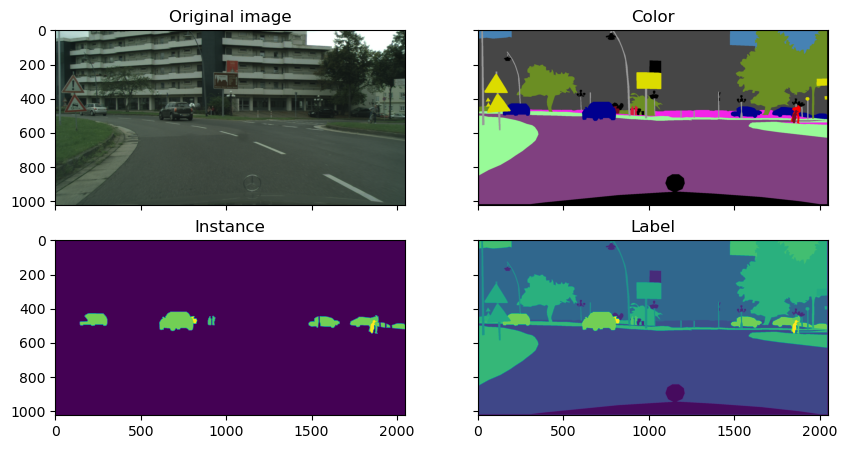

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True, sharey=True)
axes = axes.flatten()

axes[0].imshow(img_original)
axes[0].set_title('Original image')

axes[1].imshow(img_color[:, :, :3])
axes[1].set_title('Color')

axes[2].imshow(img_instance)
axes[2].set_title('Instance')

axes[3].imshow(img_label)
axes[3].set_title('Label')

# 2. Load model

```shell
activate py311ml

cd "C:\Users\Wei Zhou\Documents\zhouwei file\Github-Project\HRNet-Semantic-Segmentation"

python tools/test.py --cfg "__experiments/pretrained_model/seg_hrnet_ocr_w48_trainval_512x1024_sgd_lr1e-2_wd5e-4_bs_12_epoch484.yaml" ^
    "MODEL.PRETRAINED"  "__experiments/pretrained_model/hrnetv2_w48_imagenet_pretrained.pth" ^
    "TEST.MODEL_FILE"   "__experiments/pretrained_model/hrnet_ocr_cs_trainval_8227_torch11.pth" ^
    "OUTPUT_DIR"        "__experiments/output/" ^
    "LOG_DIR"           "__experiments/log/" ^
    "DATASET.ROOT"      "__experiments/data_test/" ^
    "DATASET.TEST_SET"  "test.lst" ^
    "TEST.BASE_SIZE"    "1024" ^
    "TEST.SCALE_LIST"   "0.5,1.0,1.5" ^
    "TEST.IMAGE_SIZE"   "1024,512" ^
    "CUDNN.ENABLED"     "False"

# 2.1 Model configuration

In [4]:
import sys
sys.path.append(r'C:\Users\Wei Zhou\Documents\zhouwei file\Python-project\Google-place-api\cv_model\HRNet-Semantic-Segmentation-HRNet-OCR\lib')

import models
from config import config
from utils.modelsummary import get_model_summary
from utils.utils import create_logger

import os
import logging

import pprint

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn

In [5]:
 def update_config(cfg, cfg_path, cfg_li):
    cfg.defrost()

    cfg.merge_from_file(cfg_path)
    cfg.merge_from_list(cfg_li)

    cfg.freeze()
# =============================================================================
# initialize config
cfg_path = r'cv_model/experiment/seg_hrnet_ocr_w48_trainval_512x1024_sgd_lr1e-2_wd5e-4_bs_12_epoch484.yaml'

cfg_li = ['MODEL.PRETRAINED', 'cv_model/experiment/hrnetv2_w48_imagenet_pretrained.pth',
          'TEST.MODEL_FILE',  'cv_model/experiment/hrnet_ocr_cs_trainval_8227_torch11.pth',
          'DATASET.ROOT',     'cv_model/experiment/datatest/',
          'DATASET.TEST_SET', 'test.lst',
          'OUTPUT_DIR',       '',
          'LOG_DIR',          'cv_model/experiment/log/',
          'TEST.SCALE_LIST',  '0.5,0.75,1.0,1.25,1.5,1.75',
          'CUDNN.ENABLED',    False]


update_config(config, cfg_path, cfg_li)
print('\n', config.MODEL.PRETRAINED,
      '\n', config.TEST.MODEL_FILE,
      '\n', config.DATASET.TEST_SET,
      '\n', config.OUTPUT_DIR,
      '\n', config.LOG_DIR,
      '\n', config.TEST.SCALE_LIST,
      '\n', config.CUDNN.ENABLED,
      '\n', config.DATASET.ROOT)


# initialize logger

logger, final_output_dir, _ = create_logger(
    config, cfg_path, 'test')
logger.info(pprint.pformat(config))

CfgNode({'OUTPUT_DIR': '', 'LOG_DIR': 'cv_model/experiment/log/', 'GPUS': (0, 1, 2, 3), 'WORKERS': 4, 'PRINT_FREQ': 10, 'AUTO_RESUME': False, 'PIN_MEMORY': True, 'RANK': 0, 'CUDNN': CfgNode({'BENCHMARK': True, 'DETERMINISTIC': False, 'ENABLED': False}), 'MODEL': CfgNode({'NAME': 'seg_hrnet_ocr', 'PRETRAINED': 'cv_model/experiment/hrnetv2_w48_imagenet_pretrained.pth', 'ALIGN_CORNERS': True, 'NUM_OUTPUTS': 2, 'EXTRA': CfgNode({'FINAL_CONV_KERNEL': 1, 'STAGE1': CfgNode({'NUM_MODULES': 1, 'NUM_RANCHES': 1, 'BLOCK': 'BOTTLENECK', 'NUM_BLOCKS': [4], 'NUM_CHANNELS': [64], 'FUSE_METHOD': 'SUM'}), 'STAGE2': CfgNode({'NUM_MODULES': 1, 'NUM_BRANCHES': 2, 'BLOCK': 'BASIC', 'NUM_BLOCKS': [4, 4], 'NUM_CHANNELS': [48, 96], 'FUSE_METHOD': 'SUM'}), 'STAGE3': CfgNode({'NUM_MODULES': 4, 'NUM_BRANCHES': 3, 'BLOCK': 'BASIC', 'NUM_BLOCKS': [4, 4, 4], 'NUM_CHANNELS': [48, 96, 192], 'FUSE_METHOD': 'SUM'}), 'STAGE4': CfgNode({'NUM_MODULES': 3, 'NUM_BRANCHES': 4, 'BLOCK': 'BASIC', 'NUM_BLOCKS': [4, 4, 4, 4], 'N


 cv_model/experiment/hrnetv2_w48_imagenet_pretrained.pth 
 cv_model/experiment/hrnet_ocr_cs_trainval_8227_torch11.pth 
 test.lst 
  
 cv_model/experiment/log/ 
 [0.5, 0.75, 1.0, 1.25, 1.5, 1.75] 
 False 
 cv_model/experiment/datatest/
=> creating cityscapes\seg_hrnet_ocr_w48_trainval_512x1024_sgd_lr1e-2_wd5e-4_bs_12_epoch484
=> creating cv_model\experiment\log\cityscapes\seg_hrnet_ocr\seg_hrnet_ocr_w48_trainval_512x1024_sgd_lr1e-2_wd5e-4_bs_12_epoch484_2024-10-27-18-39


In [6]:
# cudnn related setting
cudnn.benchmark = config.CUDNN.BENCHMARK
cudnn.deterministic = config.CUDNN.DETERMINISTIC
cudnn.enabled = config.CUDNN.ENABLED

# Model initialization
if torch.__version__.startswith('1') or torch.__version__.startswith('2'):
    module = eval('models.'+config.MODEL.NAME)
    module.BatchNorm2d_class = module.BatchNorm2d = torch.nn.BatchNorm2d
model = eval('models.' +config.MODEL.NAME + '.get_seg_model')(config)

# Model summary
dump_input = torch.rand((1, 3, config.TRAIN.IMAGE_SIZE[1], config.TRAIN.IMAGE_SIZE[0]))
if torch.cuda.is_available():
    logger.info(get_model_summary(model.cuda(), dump_input.cuda()))
else:
    logger.info(get_model_summary(model.cpu(), dump_input.cpu()))

# Load pretrained model
if config.TEST.MODEL_FILE:
    model_state_file = config.TEST.MODEL_FILE
else:
    model_state_file = os.path.join(final_output_dir, 'final_state.pth')
logger.info('=> loading model from {}'.format(model_state_file))

pretrained_dict = torch.load(model_state_file, map_location=torch.device('cpu'))
if 'state_dict' in pretrained_dict:
    pretrained_dict = pretrained_dict['state_dict']
model_dict = model.state_dict()
pretrained_dict = {k[6:]: v for k, v in pretrained_dict.items() if k[6:] in model_dict.keys()}
for k, _ in pretrained_dict.items():
    logger.info('=> loading {} from pretrained model'.format(k))

model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)

=> init weights from normal distribution
=> loading pretrained model cv_model/experiment/hrnetv2_w48_imagenet_pretrained.pth


{'ocr_distri_head.object_context_block.f_up.1.0.running_mean', 'aux_head.0.bias', 'ocr_distri_head.object_context_block.f_object.3.0.num_batches_tracked', 'ocr_distri_head.object_context_block.f_pixel.3.0.weight', 'conv3x3_ocr.1.running_var', 'aux_head.3.bias', 'conv3x3_ocr.1.running_mean', 'ocr_distri_head.object_context_block.f_pixel.0.weight', 'ocr_distri_head.object_context_block.f_object.1.0.num_batches_tracked', 'ocr_distri_head.object_context_block.f_pixel.1.0.num_batches_tracked', 'ocr_distri_head.object_context_block.f_pixel.3.0.running_mean', 'ocr_distri_head.object_context_block.f_up.1.0.num_batches_tracked', 'ocr_distri_head.object_context_block.f_up.1.0.weight', 'ocr_distri_head.object_context_block.f_pixel.3.0.running_var', 'aux_head.1.running_mean', 'aux_head.1.bias', 'ocr_distri_head.object_context_block.f_pixel.3.0.bias', 'ocr_distri_head.object_context_block.f_object.3.0.running_var', 'cls_head.bias', 'ocr_distri_head.object_context_block.f_down.0.weight', 'conv3x3_oc


Total Parameters: 70,372,678
----------------------------------------------------------------------------------------------------------------------------------
Total Multiply Adds (For Convolution and Linear Layers only): 301.59661865234375 GFLOPs
----------------------------------------------------------------------------------------------------------------------------------
Number of Layers
Conv2d : 316 layers   BatchNorm2d : 314 layers   ReLU : 277 layers   Bottleneck : 4 layers   BasicBlock : 104 layers   HighResolutionModule : 8 layers   SpatialGather_Module : 1 layers   ObjectAttentionBlock2D : 1 layers   Dropout2d : 1 layers   SpatialOCR_Module : 1 layers   
=> loading model from cv_model/experiment/hrnet_ocr_cs_trainval_8227_torch11.pth
=> loading conv1.weight from pretrained model
=> loading bn1.weight from pretrained model
=> loading bn1.bias from pretrained model
=> loading bn1.running_mean from pretrained model
=> loading bn1.running_var from pretrained model
=> loading bn

<All keys matched successfully>

# 3. Implement model (test model)

In [8]:
import models
import datasets
from core.function import testval, test

# prepare data
test_size = (config.TEST.IMAGE_SIZE[1], config.TEST.IMAGE_SIZE[0])

test_dataset = eval('datasets.'+config.DATASET.DATASET)(
    root=config.DATASET.ROOT,
    list_path=config.DATASET.TEST_SET,
    num_samples=None,
    num_classes=config.DATASET.NUM_CLASSES,
    multi_scale=False,
    flip=False,
    ignore_label=config.TRAIN.IGNORE_LABEL,
    base_size=config.TEST.BASE_SIZE,
    crop_size=test_size,
    downsample_rate=1)


testloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=config.WORKERS,
    pin_memory=True)


if 'val' in config.DATASET.TEST_SET:
    mean_IoU, IoU_array, pixel_acc, mean_acc = testval(config,
                                                       test_dataset,
                                                       testloader,
                                                       model)

    msg = 'MeanIU: {: 4.4f}, Pixel_Acc: {: 4.4f}, \
           Mean_Acc: {: 4.4f}, Class IoU: '.format(mean_IoU,
                                                    pixel_acc, mean_acc)
    logging.info(msg)
    logging.info(IoU_array)

elif 'test' in config.DATASET.TEST_SET:
    test(config,
         test_dataset,
         testloader,
         model,
         sv_dir=final_output_dir)

100%|██████████| 1/1 [01:22<00:00, 82.43s/it]
